# New Jupyter Notebook
## Author: Bukola Adeniyan
Github: https://github.com/Queensdelight/datafun-07-ml.git

In [447]:
#Import Dependencies
import jupyter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as stats
import scipy as sp
from scipy import stats
import statsmodels as sm
import logging
import sklearn
from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

# Part 1 - Chart a Straight Line

### Time Series
### Simple Linear Regression
### Linear Relationships

In [448]:
c = lambda f: 5/ 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

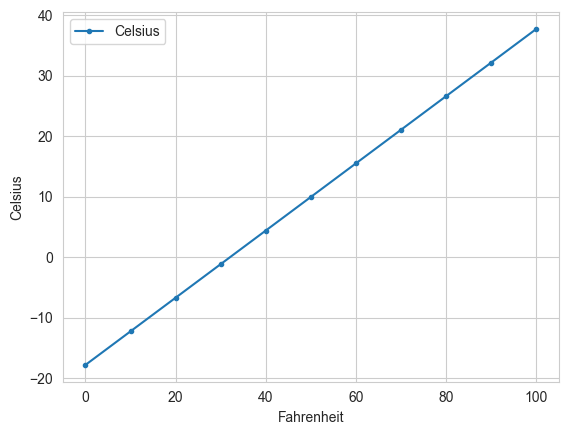

In [449]:
import pandas as pd
temps_nyc = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_nyc.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

# Part 2 - Predict Avg High Temp in NYC in January
Upload New York City Average High Temperatures into a DataFrame. Print the first 5 rows and the last 5 rows.

### Section 1 - Data Acquisition

In [450]:
# Load Data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [451]:
# Print the first 5 rows of the data
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [452]:
# Print the last 5 rows of the data
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Cleaning the Data

In [453]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [454]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [455]:
nyc.Date.dtype

dtype('int64')

In [456]:
nyc.Date = nyc.Date.floordiv(100)

In [457]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics for the Dataset

In [458]:
pd.set_option('display.precision', 2)

In [459]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Building The Model

In [460]:
from scipy import stats

In [461]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [462]:
linear_regression.slope

0.014771361132966163

In [463]:
linear_regression.intercept

8.694993233674289

In [464]:
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [465]:
linear_regression.slope * 1850 + linear_regression.intercept

36.022011329661694

### Section 6 - Visualization

In [466]:
import seaborn as sns

In [467]:
sns.set_style('whitegrid')

(10.0, 70.0)

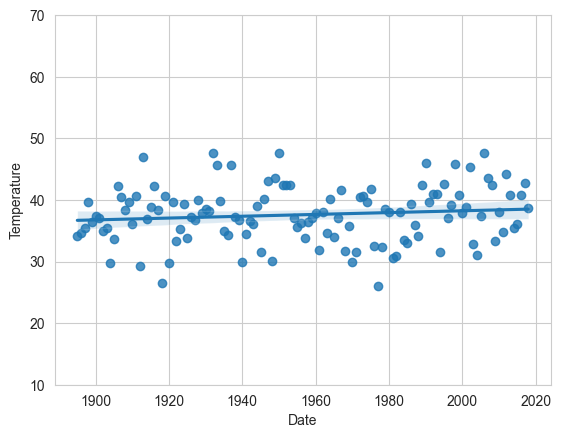

In [468]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

In [469]:
# Extra cell added to keep subsequent snippet numbers the same as the chapter.
# Had to merge the two prior cells for use in the notebook.

### Forecasting Future January Average High Temperatures

### Section 7- Use the linear regression model to
- predict the average high temperature in NYC for 2019
- approximate average temperature for years prior to 1895
- predict the average high temperature in NYC for 2024

In [470]:
#1. Use linear regression model and Year 2019
linear_regression.slope * 2019 + linear_regression.intercept

print(f'Predicted temperature in 2019:', linear_regression.slope * 2019 + linear_regression.intercept)

#2. Approximate the average high temperature in 1890
linear_regression.slope * 1890 + linear_regression.intercept    

print(f'Predicted temperature in 1890:', linear_regression.slope * 1890 + linear_regression.intercept)

#3.  Approximate the average high temperature in 2024
linear_regression.slope * 2024 + linear_regression.intercept

print(f'Predicted temperature in 2024:', linear_regression.slope * 2024 + linear_regression.intercept)

#4. Use model to determine value for 1895
linear_regression.slope * 1895 + linear_regression.intercept
print(f'Predicted temperature in 1895:', linear_regression.slope * 1895 + linear_regression.intercept)

# Calculate the R-squared value
r_squared = linear_regression.rvalue**2
print(f"R-squared: {r_squared}")

Predicted temperature in 2019: 38.51837136113297
Predicted temperature in 1890: 36.612865774980335
Predicted temperature in 2024: 38.5922281667978
Predicted temperature in 1895: 36.68672258064517
R-squared: 0.013674417965163782


## Part 3 - Prediction

### Section 1 - Build The Model

In [471]:
%matplotlib inline
import pandas as pd

In [472]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [473]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [474]:
nyc.Date = nyc.Date.floordiv(100)

In [475]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 2 - Splitting the Data for Training and Testing

In [476]:
from sklearn.model_selection import train_test_split

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [478]:
X_train.shape

(93, 1)

In [479]:
X_test.shape

(31, 1)

### Section 3 - Training the Model

In [480]:
from sklearn.linear_model import LinearRegression

In [481]:
linear_regression = LinearRegression()

In [482]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [483]:
linear_regression.coef_

array([0.01939167])

In [484]:
linear_regression.intercept_

-0.30779820252656975

In [485]:
m = linear_regression.coef_

In [486]:
b = linear_regression.intercept_

In [487]:
print(f'The linear regression equation is y = {m}x + {b}.')

The linear regression equation is y = [0.01939167]x + -0.30779820252656975.


### Section 4 - Testing the Model

In [488]:
predicted = linear_regression.predict(X_test)

In [489]:
expected = y_test

In [490]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 5 - Predicting Future Temperatures and Estimating Past Temperatures

In [491]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [492]:
predict(2019)

array([38.84399018])

In [493]:
predict(1890)

array([36.34246432])

In [494]:
predict = (lambda x: m * x + b)
predict(2024)

array([38.94094855])

In [495]:
predict = (lambda x: m * x + b)
predict(2026)

array([38.97973189])

In [496]:
predict = (lambda x: m * x + b)
predict(2028)

array([39.01851524])

### Section 6 - Visualizing the Dataset with the Regression Line

In [497]:
import seaborn as sns

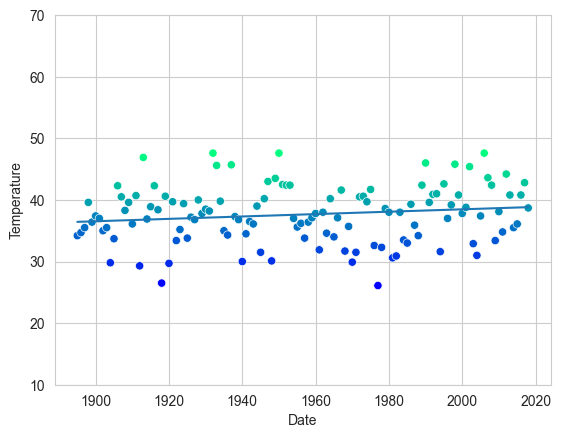

In [498]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt 

line = plt.plot(x, y)

In [499]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [500]:
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [501]:
y = predict(x)

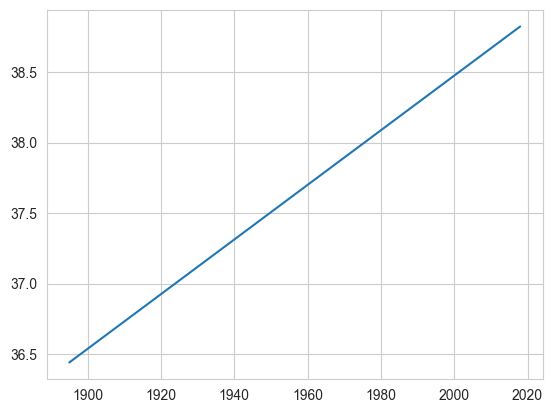

In [502]:
import matplotlib.pyplot as plt
line = plt.plot(x, y)

## Part 4 - Adding Insight To The Analysis

The average high temperatures in NYC have shown a noticeable upward trend over the period from 1895 to 2018. This indicates a long-term warming pattern.
Seasonal decomposition reveals clear seasonal patterns in temperature, with predictable increases and decreases throughout the year.
The analysis of the ave_hi_nyc_jan_1895-2018.csv dataset reveals significant trends and patterns in NYC's temperature data, highlighting the urgent need for proactive measures to address climate change. By implementing the recommended actions, the city can enhance its resilience to future climate impacts, promote sustainable development, and protect the health and well-being of its residents.